<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%20%26%20TensorFlow/Chapter%2006/06_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Menggunakan dataset Iris
iris = load_iris()
X = iris.data[:, 2:] # Hanya menggunakan fitur petal length dan width
y = iris.target

# Melatih model Decision Tree Classifier
# max_depth=2 berarti pohon hanya boleh memiliki kedalaman maksimal 2 level
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Membuat data kuadratik acak
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2 + np.random.randn(m, 1) / 10

# Melatih model Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

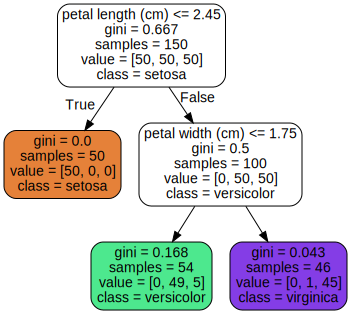

In [4]:
from sklearn.tree import export_graphviz
from graphviz import Source

# Menggunakan model yang sudah dilatih (tree_clf)
dot_data = export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# Membuat dan menampilkan grafik
graph = Source(dot_data, format="png")
graph.render("iris_decision_tree") # Menyimpan file ke iris_decision_tree.png
graph

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

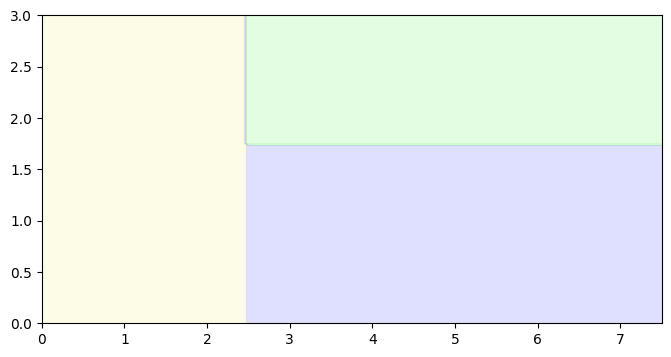

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk plot batas keputusan
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Panjang Kelopak")
        plt.ylabel("Lebar Kelopak")
    if legend:
        plt.legend(loc="lower right")

# Plotting batas keputusan untuk model tree_clf
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=0")
plt.text(3.2, 1.80, "Depth=1")
plt.title("Batas Keputusan Decision Tree (max_depth=2)")
plt.show()

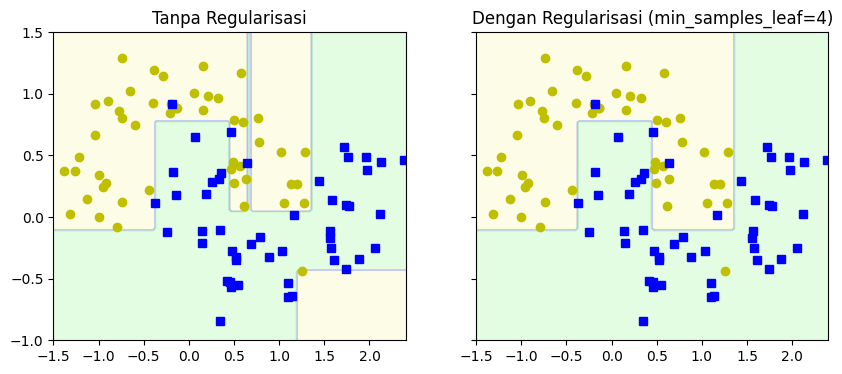

In [6]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

# Membuat dataset moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# Model tanpa regularisasi dan dengan regularisasi
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

# Plotting kedua model
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], plot_training=True, iris=False)
plt.title("Tanpa Regularisasi")
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], plot_training=True, iris=False)
plt.title("Dengan Regularisasi (min_samples_leaf=4)")
plt.ylabel("")
plt.show()

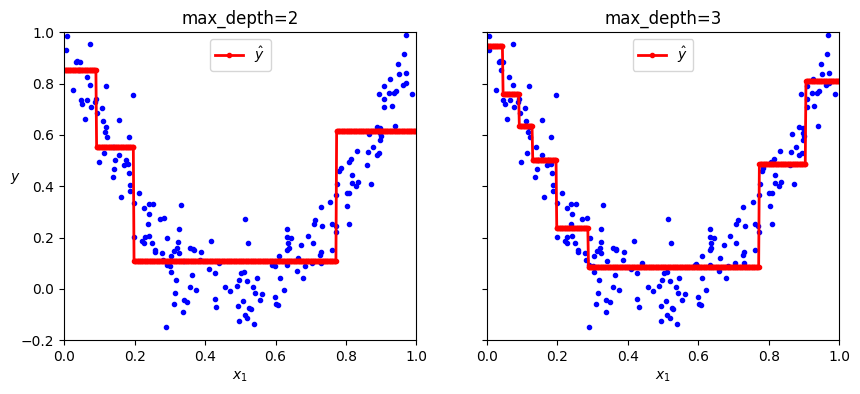

In [7]:
from sklearn.tree import DecisionTreeRegressor

# Membuat data kuadratik
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2 + np.random.randn(m, 1) / 10

# Melatih dua model regresi dengan max_depth berbeda
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    if ylabel:
        plt.ylabel(ylabel, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

# Plotting kedua model
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
plt.legend(loc="upper center")
plt.title("max_depth=2")
plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
plt.legend(loc="upper center")
plt.title("max_depth=3")
plt.show()